<a href="https://colab.research.google.com/github/phucbui95/CarMakeClassifier/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is solution for the first assignment

*Note:* I will implement a small unittest code below each main functions of the solution

# Read data from MyDrive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!mkdir -p data
!cp /gdrive/MyDrive/tikihometest/* data

In [ ]:
!ls data

AI_home_test.pdf     forward.png     test.csv
data_hometest_1.npz  submission.csv  train.csv


# Load and visualize dataset

In [ ]:
import numpy as np

In [ ]:
npzfile = np.load('data/data_hometest_1.npz')
x,y = npzfile['arr_0'], npzfile['arr_1']

In [ ]:
x.shape

(30,)

In [ ]:
y.shape

(30,)

In [ ]:
import matplotlib.pyplot as plt

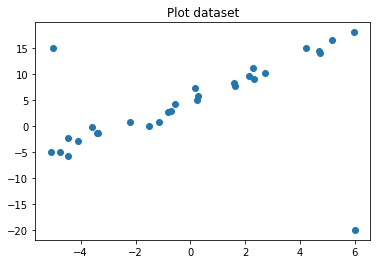

In [ ]:
plt.title("Plot dataset")
plt.scatter(x, y);

# Solution

## 1. Forward function

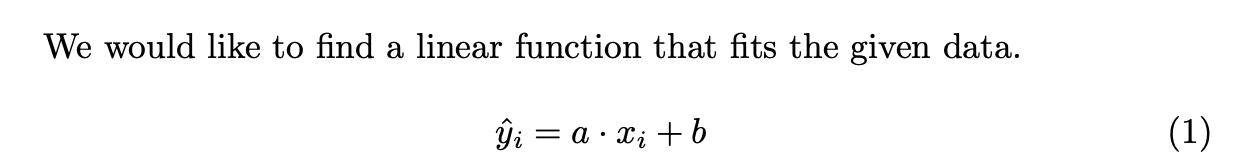

In [ ]:
def forward(X, parameters):
  a, b = parameters['a'], parameters['b']
  Y = a * X + b
  return Y

In [ ]:
X = np.array([1, 2, 3])
a = 2
b = 1
parameters = {'a':a, 'b': b}
output = forward(X, parameters)
expected = np.array([3, 5, 7])
epsilon = 1e-6
assert np.sum(output - expected) < epsilon

## 2. Compute cost function

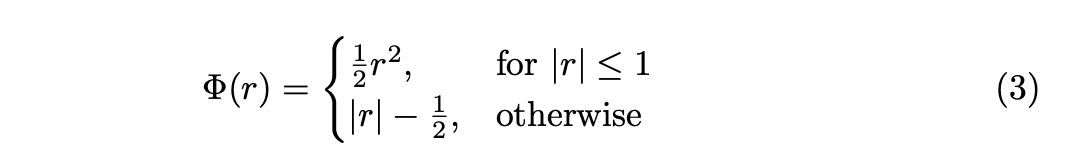

In [ ]:
def cost_function(X, Y, A, parameters):
  a, b = parameters['a'], parameters['b']
  R = Y - A
  J = np.where(np.abs(R) < 1, 0.5*np.power(R, 2), np.abs(R) - 0.5)
  return np.mean(J)

In [ ]:
X = np.array([0, -0.25, -0.75, 0.5, -2, 2])
parameters = {'a': 1.0, 'b': 0.0}
Y = np.array([0, 0, 0, 0, 0, 0])

A = forward(X, parameters)
# r = [0, 0.25, 0.75, -0.5, 2, -2]
expected_arr = np.array([0, 0.03125, 0.28125, 0.125, 1.5, 1.5])
expected_cost = np.mean(expected_arr)

output = cost_function(X, Y, A, parameters)
assert output - expected_cost < epsilon

## 3. Compute grad

deta = - xi * ( yi - b - a*xi ) if |r| <= 1

deta = xi -  1/2 if r < -1

deta = -xi - 1/2 if r > 1

---



In [ ]:
def compute_grad(X, Y, A, parameters):
  a, b = parameters['a'], parameters['b']
  m = X.shape[0]
  R = Y - A
  mask_a = np.where(R < -1, 1, 0)
  mask_b = np.where((R >= -1) & (R <= 1), 1, 0)
  mask_c = np.where(R > 1, 1, 0)

  da1 = X - 0.5
  da2 = -X * R
  da3 = -X - 0.5

  db1 = 0.5
  db2 = -R
  db3 = -1.5

  # Debug
  # print(R)
  # print(da1 * mask_a + da2 * mask_b + da3 * mask_c)
  # print(db1 * mask_a + db2 * mask_b + db3 * mask_c)

  da = (1/m) * np.sum(da1 * mask_a + da2 * mask_b + da3 * mask_c)
  db = (1/m) * np.sum(db1 * mask_a + db2 * mask_b + db3 * mask_c)
  
  grad = {'da': da, 'db': db}
  return grad

In [ ]:
X = np.array([-0.5, 0, 0.5, 1])
Y = np.array([ 0, 0, 0, 0])
a, b = 1, 0
A = X

R = [ 0.5, 0, -0.5, -1]
expected_da = np.mean([ 0.25, 0, 0.25, 1])
expected_db = np.mean([ -0.5, 0, 0.5, 1])

grad = compute_grad(X, Y, A, {'a':a, 'b': b})

assert grad['da'] == expected_da, f"{expected_da} {grad['da']}"
assert grad['db'] == expected_db, f"{expected_db} {grad['db']}"

## 4. Gradient descent function

In [ ]:
def optimize(X, Y, epoch, parameters, learning_rate, print_cost = False):
  a, b = parameters['a'], parameters['b']
  cost_history = []
  for _ in range(epoch):
    A = forward(X, parameters)
    cost = cost_function(X, Y, A, parameters)
    grad = compute_grad(X, Y, A, parameters)

    da = grad['da']
    db = grad['db']
    print("da = ", da, "  db = ", db)
    
    a[0] = a - learning_rate * da
    b[0] = b - learning_rate * db

    cost_history.append(cost)
    if print_cost:
      print("cost = ", cost)

  return parameters, cost_history


In [ ]:
X = np.array([-0.5, 0, 0.5, 1])
Y = np.array([ 0, 0, 0, 0])

a = np.array([0.5])
b = np.array([0.0])
parameters = {'a': a, 'b': b}

_, cost_history = optimize(X, Y, 5, parameters, learning_rate=0.1, print_cost=True)

assert cost_history[0] > cost_history[1]

da =  0.1875   db =  0.125
cost =  0.046875
da =  0.17734375   db =  0.1078125
cost =  0.04199951171875
da =  0.16799804687499997   db =  0.09259765625
cost =  0.0378569652557373
da =  0.1593831787109375   db =  0.079137939453125
cost =  0.034311879248797895
da =  0.15142786102294925   db =  0.06723956604003906
cost =  0.03125577596588511


## 5. Put it together

In [ ]:
def initialize_params():
  a = np.array([1.0])
  b = np.array([0.0])
  return {'a': a, 'b': b}

In [ ]:
parameters = initialize_params()
parameters, _ = optimize(x, y, 100, parameters, learning_rate=0.2, print_cost=True)

da =  -0.6799776000749459   db =  -1.2613970121067346
cost =  5.892062047974756
da =  -0.519715583691736   db =  -1.2738906578186278
cost =  5.668447112328436
da =  -0.4030798808740506   db =  -1.2981345245604252
cost =  5.454264670564186
da =  -0.3422905503186842   db =  -1.3107348663105198
cost =  5.2386632419562185
da =  -0.34118083978538477   db =  -1.3312060699661306
cost =  5.020514496856644
da =  -0.3094481265289952   db =  -1.3176564792993493
cost =  4.798986305622647
da =  -0.29638639389318416   db =  -1.2950217373610124
cost =  4.579579622868169
da =  -0.3075190759499183   db =  -1.2840601885998963
cost =  4.3656060088088555
da =  -0.31432943103994654   db =  -1.2742763583433483
cost =  4.155914039681141
da =  -0.3182508128338248   db =  -1.265295075100224
cost =  3.9500977654838385
da =  -0.32024247483085944   db =  -1.2568651702179041
cost =  3.747890614624507
da =  -0.32094637793682906   db =  -1.248818464746688
cost =  3.549109037853772
da =  -0.32079213432591647   db =  

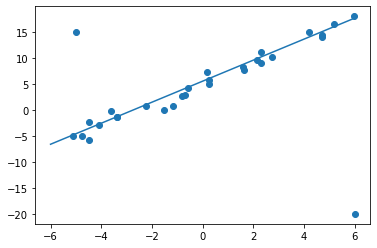

In [ ]:
xhat = np.linspace(-6, 6, 100)
yhat = parameters['a']*xhat + parameters['b']
plt.scatter(x, y);
plt.plot(xhat, yhat)